In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from numpy import random
import statsmodels.api as sm
from statsmodels.stats.stattools import jarque_bera 

# 一. 大数定律

    样本独立，方差有限，则当样本量变大时，样本平均依概率收敛至总体均值
    
    实验方法：生成lambda=2的泊松分布随机数（共100000个，作为总体），调整样本量（1-1000），每一个样本量计算一个样本平均，最终会收敛到2。

In [131]:
from numpy import random
n=100000
Total = random.poisson(lam=2, size=n)
Mean=[]
import random
for i in range(1,1000):
    samples = np.array(random.sample(list(Total),i))
    mean=np.mean(samples)
    Mean.append(mean)

Text(0.5, 1.0, 'Central Limit Theorems')

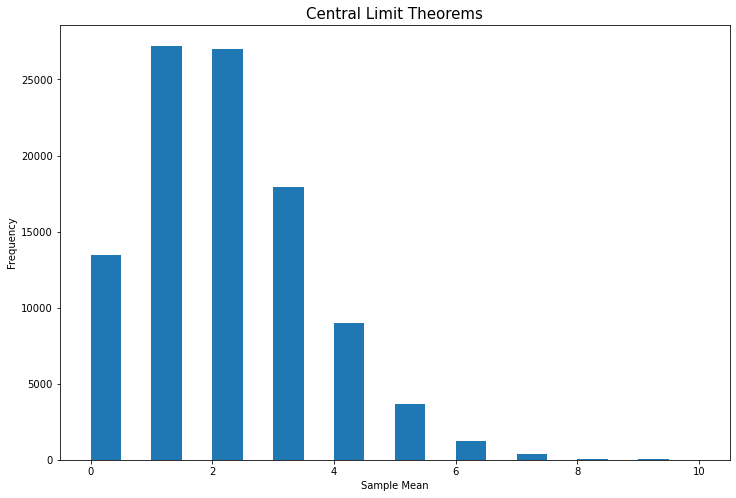

In [134]:
plt.figure(figsize=(12,8))
plt.hist(Total,bins=20)
plt.xlabel('Sample Mean',fontsize=10)
plt.ylabel('Frequency',fontsize=10)
plt.title('Central Limit Theorems',fontsize=15)

Text(0.5, 1.0, 'Law of Large Numbers')

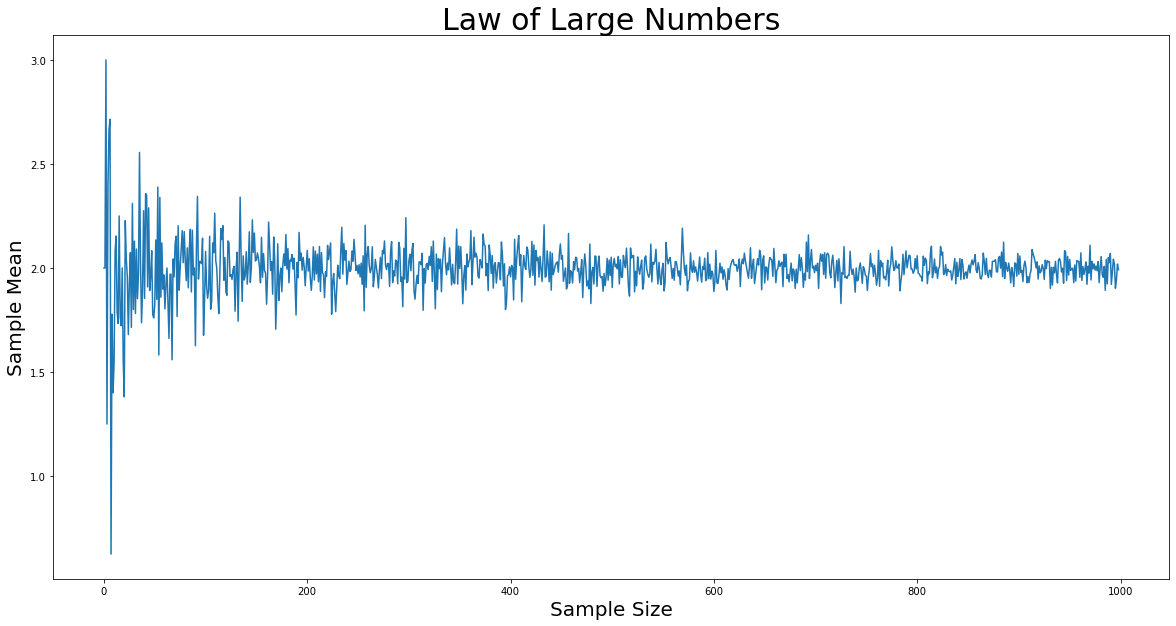

In [133]:
plt.figure(figsize=(20,10))
plt.plot(Mean)
plt.xlabel('Sample Size',fontsize=20)
plt.ylabel('Sample Mean',fontsize=20)
plt.title('Law of Large Numbers',fontsize=30)

# 二. 中心极限定理

    样本独立，方差有限，大样本下，样本均值会渐进服从正态分布。
    
    实验方法：生成lambda=2的泊松分布随机数（共100000个，作为总体），每一次均取一个1000样本，计算平均，一共取1000次。平均数应该有一个分布，这个分布和正态分布应该很像。其均值为2，方差为2/1000=0.004

In [124]:
from numpy import random
n=100000
Total = random.poisson(lam=2, size=n)
Mean1=[]
import random
for i in range(1,1000):
    samples = np.array(random.sample(list(Total),1000))
    mean=np.mean(samples)
    Mean1.append(mean)

Mean:1.999873873873874,Variance:0.0020867308389470544
Skewness:0.09962090827479726,Kurtosis:2.9552282184442062,JB-pValue:0.41982429457104875


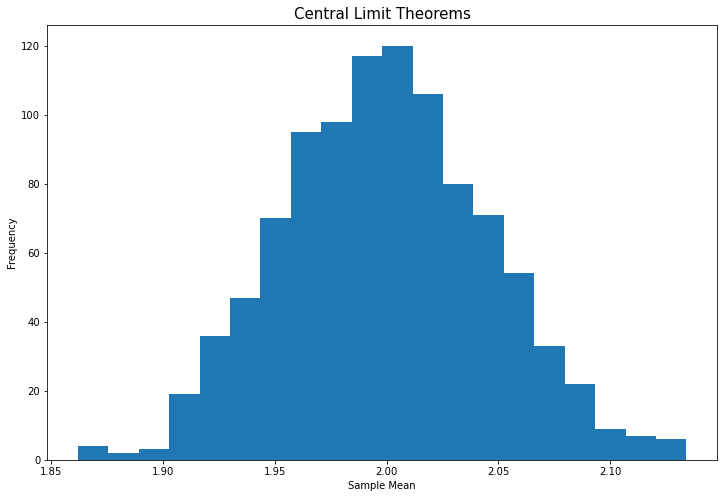

In [125]:
plt.figure(figsize=(12,8))
plt.hist(Mean1,bins=20)
plt.xlabel('Sample Mean',fontsize=10)
plt.ylabel('Frequency',fontsize=10)
plt.title('Central Limit Theorems',fontsize=15)
print('Mean:{},Variance:{}'.format(np.mean(Mean1),np.std(Mean1)*np.std(Mean1)))

mean_norm=(Mean1-np.mean(Mean1))/np.std(Mean1)
jb_test = jarque_bera(mean_norm) 
print('Skewness:{},Kurtosis:{},JB-pValue:{}'.format(jb_test[2],jb_test[3],jb_test[1]))

# 三. OLS估计

![title](OLS.jpeg)

0. 探索性数据分析

<AxesSubplot:>

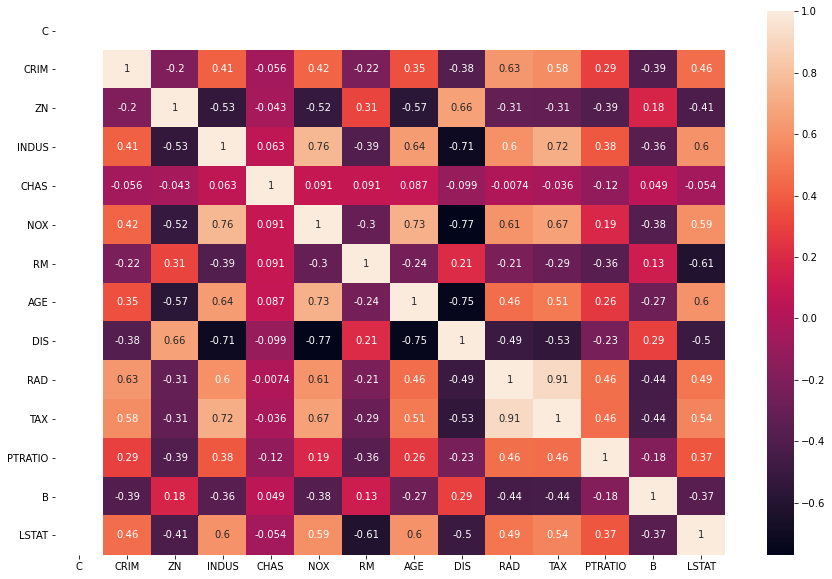

In [158]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.heatmap(X.corr(),annot=True)

1. 导入数据，用系统给定的方法估计OLS

In [4]:
from sklearn.datasets import load_boston 
boston = load_boston ()
boston.keys()
x = boston["data"]
Y = pd.DataFrame(boston["target"]) 
X = pd.DataFrame(sm.add_constant(x)) #加上截距项
X.columns=np.append(np.array(['C']),boston['feature_names'])
model = sm.OLS(Y, X).fit() 
print (model.summary())

                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 26 Apr 2022   Prob (F-statistic):          6.72e-135
Time:                        10:28:21   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
C             36.4595      5.103      7.144      0.0

 2. 估计系数

In [43]:
coef=np.dot(np.linalg.inv(np.dot(X.T,X)),np.dot(X.T,Y))

3. 计算系数的标准差，以及t统计量

In [174]:
Yhat=np.dot(X,coef)
e=Y-Yhat
RSS=np.sum(e*e)
n=np.size(X,0)
k=np.size(X,1)
var_e=RSS/(n-k)
cov_beta=pd.DataFrame(np.linalg.inv(np.dot(X.T,X))*var_e[0])
t=np.diag(coef/np.sqrt(np.diag(cov_beta)))


4. 计算p统计量

In [203]:
from scipy.stats import norm
p=2*norm.cdf(-np.abs(t))
t_edge=norm.ppf(0.975)

5. 计算拟合优度

In [204]:
ESS=np.sum((Yhat-np.mean(Yhat))*(Yhat-np.mean(Yhat)))
TSS=np.sum((Y-np.mean(Y))*(Y-np.mean(Y)))
R_square=ESS/TSS
Adj_R=1-(1-R_square)*(n-1)/(n-k-1)

6. 计算置信区间

In [205]:
b1=np.diag(coef+t_edge*np.sqrt(np.diag(cov_beta)))
b2=np.diag(coef-t_edge*np.sqrt(np.diag(cov_beta)))

7. 生成实验表格

In [206]:
table_temp=pd.DataFrame([np.sqrt(np.diag(cov_beta)),t,p,b2,b1])
table=pd.concat([pd.DataFrame(coef).T,table_temp],axis=0).T.round(3)
table.index=np.append(np.array(['C']),boston['feature_names'])
table.columns=['coef', 'std err' ,'t'    , 'P>|t|'  ,    '[0.025'    ,  '0.975]']
print('R-squared: {}'.format(round(R_square,3)))
print('Adj. R-squared: {}'.format(round(Adj_R,3)))
print(table)

R-squared: 0    0.741
dtype: float64
Adj. R-squared: 0    0.733
dtype: float64
           coef  std err       t  P>|t|  [0.025  0.975]
C        36.459    5.103   7.144  0.000  26.457  46.462
CRIM     -0.108    0.033  -3.287  0.001  -0.172  -0.044
ZN        0.046    0.014   3.382  0.001   0.020   0.073
INDUS     0.021    0.061   0.334  0.738  -0.100   0.141
CHAS      2.687    0.862   3.118  0.002   0.998   4.375
NOX     -17.767    3.820  -4.651  0.000 -25.253 -10.280
RM        3.810    0.418   9.116  0.000   2.991   4.629
AGE       0.001    0.013   0.052  0.958  -0.025   0.027
DIS      -1.476    0.199  -7.398  0.000  -1.866  -1.085
RAD       0.306    0.066   4.613  0.000   0.176   0.436
TAX      -0.012    0.004  -3.280  0.001  -0.020  -0.005
PTRATIO  -0.953    0.131  -7.283  0.000  -1.209  -0.696
B         0.009    0.003   3.467  0.001   0.004   0.015
LSTAT    -0.525    0.051 -10.347  0.000  -0.624  -0.425


In [106]:
def fit(self):
    X=self.x
    Y=self.y
    coef=np.dot(np.linalg.inv(np.dot(X.T,X)),np.dot(X.T,Y))
    self.coef=coef
    
    Yhat=np.dot(X,coef)
    e=Y-Yhat
    
    RSS=np.sum(e*e)
    n=np.size(X,0)
    k=np.size(X,1)
    var_e=RSS/(n-k)
    cov_beta=pd.DataFrame(np.linalg.inv(np.dot(X.T,X))*var_e[0])
    t=np.diag(coef/np.sqrt(np.diag(cov_beta)))
    
    from scipy.stats import norm
    p=2*norm.cdf(-np.abs(t))
    t_edge=norm.ppf(0.975)
    
    ESS=np.sum((Yhat-np.mean(Yhat))*(Yhat-np.mean(Yhat)))
    TSS=np.sum((Y-np.mean(Y))*(Y-np.mean(Y)))
    R_square=ESS/TSS
    Adj_R=1-(1-R_square)*(n-1)/(n-k-1)
    
    b1=np.diag(coef+t_edge*np.sqrt(np.diag(cov_beta)))
    b2=np.diag(coef-t_edge*np.sqrt(np.diag(cov_beta)))
    
    self.yhat=Yhat
    self.resi=e
    self.R_square=R_square
    self.Adj_R=Adj_R
    self.cov_beta=cov_beta
    self.t=t
    self.p=p
    self.b2=b2
    self.b1=b1
    
def show(self):
    table_temp=pd.DataFrame([np.sqrt(np.diag(self.cov_beta)),self.t,self.p,self.b2,self.b1])
    table=pd.concat([pd.DataFrame(self.coef).T,table_temp],axis=0).T.round(3)
    table.index=self.x.columns
    table.columns=['coef', 'std err' ,'t'    , 'P>|t|'  ,    '[0.025'    ,  '0.975]']
    print('R-squared: {}'.format(round(self.R_square,3)))
    print('Adj. R-squared: {}'.format(round(self.Adj_R,3)))
    print(table)
    
def cov_mat(self):
    import seaborn as sns
    plt.figure(figsize=(15,10))
    sns.heatmap(self.x.corr(),annot=True)
    self.cov=self.x.corr()
    
def pred(self,new_data_x):
    Y_pred=np.dot(new_data_x,self.coef)
    return Y_pred
    
class My_OLS():
    def __init__(self,data_x,data_y):
        self.x=data_x
        self.y=data_y
    fit=fit
    show=show
    pred=pred
    cov_mat=cov_mat

In [107]:
model=My_OLS(X,Y)
model.fit()
model.show()
predict=model.pred(X.iloc[0:100,:])

R-squared: 0    0.741
dtype: float64
Adj. R-squared: 0    0.733
dtype: float64
           coef  std err       t  P>|t|  [0.025  0.975]
C        36.459    5.103   7.144  0.000  26.457  46.462
CRIM     -0.108    0.033  -3.287  0.001  -0.172  -0.044
ZN        0.046    0.014   3.382  0.001   0.020   0.073
INDUS     0.021    0.061   0.334  0.738  -0.100   0.141
CHAS      2.687    0.862   3.118  0.002   0.998   4.375
NOX     -17.767    3.820  -4.651  0.000 -25.253 -10.280
RM        3.810    0.418   9.116  0.000   2.991   4.629
AGE       0.001    0.013   0.052  0.958  -0.025   0.027
DIS      -1.476    0.199  -7.398  0.000  -1.866  -1.085
RAD       0.306    0.066   4.613  0.000   0.176   0.436
TAX      -0.012    0.004  -3.280  0.001  -0.020  -0.005
PTRATIO  -0.953    0.131  -7.283  0.000  -1.209  -0.696
B         0.009    0.003   3.467  0.001   0.004   0.015
LSTAT    -0.525    0.051 -10.347  0.000  -0.624  -0.425


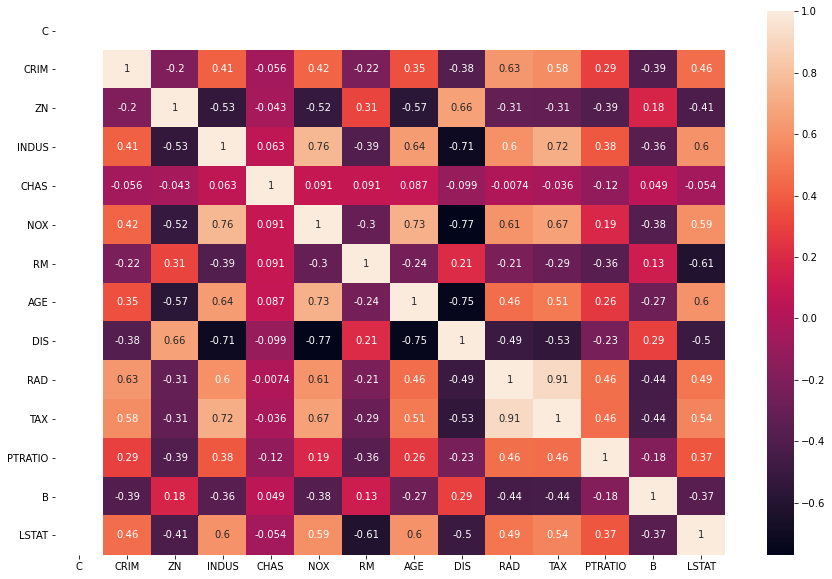

In [108]:
model.cov_mat()

# 四. OLS抽样分布

    如果最小二乘假设成立（四条），那么系数应该服从渐进正态的抽样分布
    
    实验方法：为了让最小二乘假设成立，我们生成一组回归，加入随机误差项，之后从中不断抽样。这样，最小二乘第一和第二假设均成立。此外，没有多重共线性和峰度有限也可以保证。这样，我们抽取10000次，每次抽取100个样本，计算beta1的值，绘制直方图，应该有正态分布的特征、

In [72]:
resi=pd.DataFrame(np.random.randn(n))
x=X.iloc[:,0:2]
y=np.add(np.add(X.iloc[:,0:1]*4,X.iloc[:,1:2]*5),resi)
Total=pd.concat([x,y],axis=1)
Total.columns=['C','X','Y']

<ipython-input-72-9b80a49d4f59>:3: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  y=np.add(np.add(X.iloc[:,0:1]*4,X.iloc[:,1:2]*5),resi)


In [83]:
beta1_all=[]
for i in range(0,10000):
    samp=Total.sample(n=400)
    x_samp=samp.iloc[:,0:-1]
    y_samp=samp.iloc[:,-1]
    coef_samp=np.dot(np.linalg.inv(np.dot(x_samp.T,x_samp)),np.dot(x_samp.T,y_samp))
    beta1=coef_samp[1]
    beta1_all.append(beta1)

Mean:5.001309388611219,Variance:4.265373627426065e-06
Skewness:0.4372064317697949,Kurtosis:3.743332000129248,JB-pValue:6.72598357875754e-120


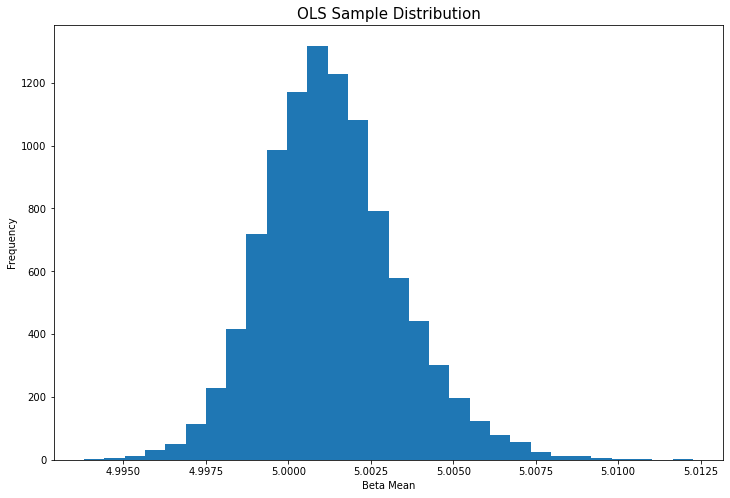

In [84]:
plt.figure(figsize=(12,8))
plt.hist(beta1_all,bins=30)
plt.xlabel('Beta Mean',fontsize=10)
plt.ylabel('Frequency',fontsize=10)
plt.title('OLS Sample Distribution',fontsize=15)
print('Mean:{},Variance:{}'.format(np.mean(beta1_all),np.std(beta1_all)*np.std(beta1_all)))

beta_norm=(beta1_all-np.mean(beta1_all))/np.std(beta1_all)
jb_test = jarque_bera(beta_norm) 
print('Skewness:{},Kurtosis:{},JB-pValue:{}'.format(jb_test[2],jb_test[3],jb_test[1]))